# First : Data Processing

### The required answers need some work to make data tidy , it is already clean have no issues except some null values in Exam score , i.e we need for answering correlation point between questions categories ( parental performance , teachers performance , and ICT skills) related questions we need to define questions related to each category first, then average their scores per student , then merge these averages to compose the data adequte for answering points related to questions' categories.

### Here we have 3 steps as we will see , geathering data , assessing data i.e testing if it has quality or tidiness issues , cleaning data i.e solving these issues.

### Also there are points ask about the general correlation between survey score (regardless questions) and exam score, and also if gender(generally) matters in survey score they can be responded from the main data frame as will follow

#### importing library requrements

In [1]:
import numpy as np
import pandas as pd 
import re
from scipy import stats
import scipy
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt
import math

### 1 -Gathering Data:

#### Reading data into pandas data frame, specifying separator as ';' and encoding to ISO-8859-1 in order not to raise error due to arabic characters

#### I saved dataset as comma delimited object to save in storageand make it easier to read in pandas

In [2]:
survey_data_row = pd.read_csv('survey_data.csv' , sep='\t' , encoding = "utf-16" ,error_bad_lines=False)

In [3]:
survey_data_row.head()

,Student Code,Grade,Gender,Question,School Code,Survey Score,Survey Time Spent,Exam Score
0,123-101,Grade 6,Boys,Navigating web pages,2000,0.666667,20,36.0
1,123-101,Grade 6,Boys,Typing on a keyboard,2000,0.666667,20,36.0
2,123-102,Grade 6,Boys,Listening and comprehending audio materials ...,2000,0.666667,9,34.0
3,123-102,Grade 6,Boys,Manipulating objects on the screen,2000,0.666667,9,34.0
4,123-102,Grade 6,Boys,Navigating web pages,2000,0.666667,9,34.0


### 2 - Assessing data

#### we check columns data types

In [4]:
survey_data_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46080 entries, 0 to 46079
Data columns (total 8 columns):
Student Code         46080 non-null object
Grade                46080 non-null object
Gender               46080 non-null object
Question             46080 non-null object
School Code          46080 non-null int64
Survey Score         46080 non-null float64
Survey Time Spent    46080 non-null int64
Exam Score           45960 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.8+ MB


#### we find that column 'Exam Score' contains some null values that we will need to deal with later

#### We run the following code to modify if a numeric column coded as string objects and modify them to float

In [5]:
survey_data_row = survey_data_row.convert_objects(convert_numeric=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


#### we then copy the main data frame to another dataframe to run our moodifications on, in order not to modify our original dataset as much as we can

In [6]:
survey_data=survey_data_row.copy()

In [7]:
survey_data.head()

,Student Code,Grade,Gender,Question,School Code,Survey Score,Survey Time Spent,Exam Score
0,123-101,Grade 6,Boys,Navigating web pages,2000,0.666667,20,36.0
1,123-101,Grade 6,Boys,Typing on a keyboard,2000,0.666667,20,36.0
2,123-102,Grade 6,Boys,Listening and comprehending audio materials ...,2000,0.666667,9,34.0
3,123-102,Grade 6,Boys,Manipulating objects on the screen,2000,0.666667,9,34.0
4,123-102,Grade 6,Boys,Navigating web pages,2000,0.666667,9,34.0


#### then we run some describtive statistics on some columns of interest

#### we check then how maany unique students in dataset

In [8]:
len(survey_data['Student Code'].drop_duplicates())

768

In [9]:
len(survey_data['Student Code'])

46080

#### so we state that we have a data set of length 46080 with 768 students

#### then , we manipulate 'Questions' column to find how many unique questions for each student, also to save time we deal only with Rnglish characters

In [10]:
survey_data['English_Questions'] = survey_data['Question'].str.replace('[^a-zA-Z]',' ')

In [11]:
survey_data['English_Questions'].value_counts()

I read e books articles online                                                                                                                                             768
I want to be praised by parents when I perform well at school                                                                                                              768
I am confident that I can learn what is being taught in class                                                                                                              768
I watch educational videos                                                                                                                                                 768
I can be a faster learner with effort                                                                                                                                      768
My parents discuss my school performance with me                                                                             

In [12]:
survey_data['Student Code'].value_counts()


123-1468    60
123-101     60
123-1725    60
123-927     60
123-857     60
123-134     60
123-1432    60
123-749     60
123-717     60
123-634     60
123-790     60
123-115     60
123-1323    60
123-1743    60
123-1493    60
123-1374    60
123-691     60
123-1474    60
123-593     60
123-1388    60
123-429     60
123-616     60
123-1405    60
123-1755    60
123-132     60
123-625     60
123-1366    60
123-589     60
123-654     60
123-1484    60
            ..
123-1320    60
123-776     60
123-1722    60
123-424     60
123-563     60
123-644     60
123-135     60
123-1435    60
123-704     60
123-1358    60
123-583     60
123-646     60
123-1427    60
123-1748    60
123-1357    60
123-1401    60
123-884     60
123-1362    60
123-196     60
123-1368    60
123-664     60
123-696     60
123-109     60
123-609     60
123-643     60
123-872     60
123-2573    60
123-1749    60
123-1332    60
123-1339    60
Name: Student Code, Length: 768, dtype: int64

#### now we realize our data structure , we have 768 unique students (not 2477) each asked 60 unique questions

### 3 - cleaning data 

In [13]:
survey_data.describe()

,School Code,Survey Score,Survey Time Spent,Exam Score
count,46080.000000,46080.000000,46080.000000,45960.000000
mean,5748.697917,0.800239,112.415365,36.296345
std,2690.313287,0.254903,326.831846,18.869542
min,1000.000000,0.000000,2.000000,0.000000
25%,4000.000000,0.666667,11.000000,21.000000
50%,5000.000000,1.000000,17.500000,33.000000
75%,8000.000000,1.000000,26.000000,50.000000
max,10000.000000,1.000000,1439.000000,100.000000


#### as we stated, we have some null values in 'Exam Score' column that may cause problem during restructuring data to make it adequte to answer points related to Parental Involvement , teacher facilitation , and ICT skills 

#### so we replace them by zero

In [14]:
survey_data['Exam Score']=survey_data['Exam Score'].fillna('0')

### now , we realized of our data structure, we then transfer to specifying questions of each category


#### we try to extract questions in a separate variables to have a tidy dataset , each student in a row, each information about a student , his/her performance or response to a question in survey in a row
#### we will solve this issue later

#### our challange needs to define questions related to 3 areas 


#### we extract questions related to each category i.e teachers,parents , and ICT skills using substrings of interest 

#### so regarding teacher facilitation,  we select all questions include 'teacher' word as follows

#### from this prespective it is easier to deal with questions as values not as columns , so we return to our original dataset 

#### we then take the data related to each category of questions in a separate dataset

#### then take the average of survey score per question for each of the 768 student for each of the 3 datasets

#### let's start with teacher facilitation data

#### we take all data of the 5 questions related to parental involvement , teachers facility , and ict skills
#### then we reshape them making each question's survey scores for the 768 students as a columns , and the 768 students in rows as we will need that to answer questions

In [15]:
survey_data['teacher']=survey_data.English_Questions.str.contains('teacher')

In [16]:
survey_data['teacher']=survey_data['teacher']*1

In [17]:
survey_data['teacher'].value_counts()

0    42240
1     3840
Name: teacher, dtype: int64

#### so we have 3840/768 = 5 question of the 60 talk about  teacher facilitation

#### we do the similar with questions related to parents

In [18]:
survey_data['parent']=survey_data.English_Questions.str.contains('parent')

In [19]:
survey_data['parent']=survey_data['parent']*1

In [20]:
survey_data['parent'].value_counts()

0    40704
1     5376
Name: parent, dtype: int64

#### so we have 5376/768 = 7 question of the 60 talk about parental performance

#### the similar with questions related ti ict skills, we chose some words that may be related to ICT field like(technology,mouse,computer,games,laptop,screen,digital,internet,web,keyboard) considering questions that include them as ICT skills related questions

In [21]:
survey_data['ict_skills']=survey_data.English_Questions.str.contains('technology|mouse|computer|games|laptop|screen|digital|internet|web|keyboard')

In [22]:
survey_data['ict_skills']=survey_data['ict_skills']*1

In [23]:
survey_data['ict_skills'].value_counts()

0    36096
1     9984
Name: ict_skills, dtype: int64

#### so we have 9984/768 = 13 question of the 60 talk about parental performance


### then we take questions related to each group then restructure it to make data tidy i.e each case (student) in a row and each question's survet score in a column

### we perform that , for easing purpose for the 3 sets of questions havinng a separate data for each instead of having a whole dataset with the 60 questions each in a column

In [24]:
data_of_parents_original=survey_data.loc[survey_data.parent==1 , ['Student Code','School Code','Gender','Grade' ,'English_Questions' ,'Survey Score', 'Survey Time Spent' ,'Exam Score']]

In [25]:
data_of_parents_restructured=data_of_parents_original.pivot_table(index=['Student Code','Grade','Gender','School Code','Survey Time Spent','Exam Score'] , columns='English_Questions' , values='Survey Score').reset_index().rename_axis(None, 1)

#### the result is as follows , we have 768 students with average score of the 5 questions related to parental involvement

In [26]:
data_of_parents_restructured.head()

,Student Code,Grade,Gender,School Code,Survey Time Spent,Exam Score,I want to be praised by parents when I perform well at school,My parents chat with me,My parents discuss my school performance with me,My parents encourage me to set my learning goal,My parents hired a private tutor to help me,My parents support me with my homework,My parents tutor me themselves
0,123-101,Grade 6,Boys,2000,20,36,0.333333,0.25,1.0,0.6,0.50,0.8,1.0
1,123-102,Grade 6,Boys,2000,9,34,1.000000,1.00,1.0,0.6,0.50,1.0,1.0
2,123-1024,Grade 6,Girls,5000,10,41,1.000000,1.00,1.0,1.0,0.50,0.8,0.8
3,123-1025,Grade 6,Girls,5000,18,43,1.000000,1.00,1.0,1.0,0.60,1.0,0.8
4,123-1026,Grade 6,Girls,5000,14,38,1.000000,1.00,1.0,1.0,0.25,1.0,0.8


In [27]:
data_of_parents_restructured = data_of_parents_restructured.convert_objects(convert_numeric=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [28]:
data_of_teachers_original=survey_data.loc[survey_data.teacher==1 , ['Student Code','School Code','Gender','Grade' ,'English_Questions' ,'Survey Score', 'Survey Time Spent' ,'Exam Score']]

In [29]:
data_of_teachers_original.head()

,Student Code,School Code,Gender,Grade,English_Questions,Survey Score,Survey Time Spent,Exam Score
24,123-101,2000,Boys,Grade 6,Followed the teachers instructions in class ...,0.250000,20,36
55,123-101,2000,Boys,Grade 6,I want to be praised by my teachers when I per...,0.666667,20,36
89,123-102,2000,Boys,Grade 6,Followed the teachers instructions in class ...,0.800000,9,34
108,123-102,2000,Boys,Grade 6,I want to be praised by my teachers when I per...,1.000000,9,34
114,123-101,2000,Boys,Grade 6,My teachers take time to make sure I understan...,0.250000,20,36


In [30]:
data_of_teachers_restructured=data_of_teachers_original.pivot_table(index=['Student Code','Grade','Gender','School Code','Survey Time Spent','Exam Score'] , columns='English_Questions' , values='Survey Score').reset_index().rename_axis(None, 1)

#### the result is as follows , we have 768 students with average score of the 5 questions related to teacher facilities

In [31]:
data_of_teachers_restructured.head()

,Student Code,Grade,Gender,School Code,Survey Time Spent,Exam Score,Followed the teachers instructions in class,I want to be praised by my teachers when I perform well,My teachers give students opportunities to express opinions,My teachers take time to make sure I understand the material,When I feel like giving up on a difficult task my teachers encourage me to keep trying
0,123-101,Grade 6,Boys,2000,20,36,0.25,0.666667,0.5,0.25,0.25
1,123-102,Grade 6,Boys,2000,9,34,0.80,1.000000,0.6,0.60,0.60
2,123-1024,Grade 6,Girls,5000,10,41,1.00,1.000000,1.0,0.80,1.00
3,123-1025,Grade 6,Girls,5000,18,43,0.80,1.000000,0.6,1.00,0.80
4,123-1026,Grade 6,Girls,5000,14,38,1.00,1.000000,1.0,1.00,1.00


In [32]:
data_of_teachers_restructured = data_of_teachers_restructured.convert_objects(convert_numeric=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [33]:
data_of_ict_skills_original=survey_data.loc[survey_data.ict_skills==1 , ['Student Code','School Code','Gender','Grade' ,'English_Questions' ,'Survey Score', 'Survey Time Spent' ,'Exam Score']]

In [34]:
data_of_ict_skills_original.head()

,Student Code,School Code,Gender,Grade,English_Questions,Survey Score,Survey Time Spent,Exam Score
0,123-101,2000,Boys,Grade 6,Navigating web pages,0.666667,20,36
1,123-101,2000,Boys,Grade 6,Typing on a keyboard,0.666667,20,36
3,123-102,2000,Boys,Grade 6,Manipulating objects on the screen,0.666667,9,34
4,123-102,2000,Boys,Grade 6,Navigating web pages,0.666667,9,34
5,123-102,2000,Boys,Grade 6,Reading and comprehending digital texts,0.666667,9,34


In [35]:
data_of_ict_skills_restructured=data_of_ict_skills_original.pivot_table(index=['Student Code','Grade','Gender','School Code','Survey Time Spent','Exam Score'] , columns='English_Questions' , values='Survey Score').reset_index().rename_axis(None, 1)

#### the result is as follows , we have 768 students with average score of the 5 questions related to ict_skills

In [36]:
data_of_ict_skills_restructured.head()

,Student Code,Grade,Gender,School Code,Survey Time Spent,Exam Score,I am comfortable using technology,I am really excited to explore new technology,I do homework on a computer laptop,I feel confident in my ability to learn new technology,I like playing educational games,I like reading digitally rather than on paper,I play educational games,Manipulating objects on the screen,Navigating web pages,Reading and comprehending digital texts,Selecting texts with a mouse,Typing on a keyboard,When I come across problems with technology I am confident that I can resolve them
0,123-101,Grade 6,Boys,2000,20,36,0.75,0.50,0.50,1.00,0.25,0.50,1.00,1.000000,0.666667,1.000000,1.000000,0.666667,0.50
1,123-102,Grade 6,Boys,2000,9,34,0.75,0.75,1.00,0.75,0.75,0.50,0.75,0.666667,0.666667,0.666667,0.666667,0.666667,0.75
2,123-1024,Grade 6,Girls,5000,10,41,0.75,0.75,1.00,1.00,0.50,0.75,0.75,1.000000,0.666667,1.000000,1.000000,0.666667,1.00
3,123-1025,Grade 6,Girls,5000,18,43,0.75,0.75,0.75,1.00,0.75,0.75,1.00,0.666667,0.666667,0.666667,0.666667,0.666667,1.00
4,123-1026,Grade 6,Girls,5000,14,38,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,0.666667,1.000000,0.666667,1.000000,0.75


In [37]:
data_of_ict_skills_restructured = data_of_ict_skills_restructured.convert_objects(convert_numeric=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


#### doing the same with questions related to parental involvment we collect data related to the 7 questions that measure parental involvment for the 768 students in a separate data

# Second : Answering questions

###  we need to define a function that calculates correlation coeffecients as we will need it a lot in the questions belows

In [38]:
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return  (z_to_r(lo), z_to_r(hi))

### Q1 : What is the general correlation between Survey Score and Exam Score?

### Answer :

#### for the first coeffecient between generally the exam score and survey score we have the full data with 
#### 46080 cases
#### also having the final data with the final results of 768 unique students

#### we have 95% confidence level so alpha in all our tests will be 1-0.95=0.05

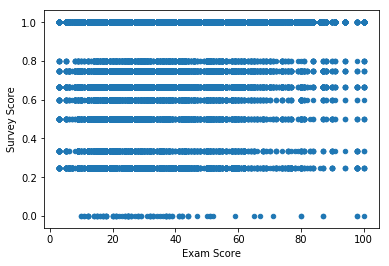

In [39]:
survey_data_row.loc[survey_data_row['Exam Score'] > 0,['Survey Score','Exam Score']].plot.scatter(x='Exam Score',
...                       y='Survey Score')

#### we see from the scatterplot that generally higher exam score near 100 are generally lesser , but they are more between studenta that have survey score near one , that indicates a positive correlation , let's check this intuition by calculationg correlation coeffecient and checking its significance

In [40]:
survey_data_row.loc[survey_data_row['Exam Score'] > 0,['Survey Score','Exam Score']].corr()

,Survey Score,Exam Score
Survey Score,1.000000,0.123111
Exam Score,0.123111,1.000000


In [41]:
print(np.around((r_confidence_interval(0.123111
,0.05,46080)),2))

[ 0.11  0.13]


#### so here for Q1 we   obtain (0.11  0.13) as the confidence interval for population’s correlation coefficient between Exam score and survey score. Because this interval is far from 0, we can conclude that there is a significant positive correlation between the  Exam score and survey score

### Final Answer to Q1 :

#### so here for Q1 we   obtain (0.11 , 0.13) as the confidence interval for population’s correlation coefficient between Exam score and survey score. Because this interval is far from 0, we can conclude that there is a significant positive correlation between the  Exam score and survey score


# Q2 : Is there any correlation between the students’ feedback on Parental Involvement questions and their Exam score? What about Teacher facilitation and ICT Skill questions?  
# (You need to identify the relevant questions of these categories) 


### Answer: 

#### We introduced above how we identified relevent questions for each category
#### A: Questions related to parental involvement we chose all questions include the word "Parent" in the text , they were 7 questions
#### B : Questions related to teachers facility we chose all questions include the word "teacher" in the text , they were 5 questions
#### C : Questions related to ICT skills we  chose all questions that contain words related to ICT industry
#### like what we chose (technology,mouse,computer,games,laptop,screen,digital,internet,web,keyboard)

### Then we made a dataset called final data set contains student code , school code , gender , grade , exam score to help us for this point

#### First: We compute pearson correlation coeffecient between Exam score and questions related to each of the 3 factors 

In [42]:
parents_coeffecients = pd.DataFrame(data_of_parents_restructured.iloc[:, 5:].corr())['Exam Score']

In [43]:
parents_coeffecients

Exam Score                                                                                                            1.000000
I want to be praised by parents when I perform well at school                                                         0.081940
My parents chat with me                                                                                               0.198448
My parents discuss my school performance with me                                                                      0.245474
My parents encourage me to set my learning goal                                                                       0.268005
My parents hired a private tutor to help me                                                                          -0.103762
My parents support me with my homework                                                                                0.226798
My parents tutor me themselves                                                                                 

In [44]:
teachers_coeffecients = pd.DataFrame(data_of_teachers_restructured.iloc[:, 5:].corr())['Exam Score']

In [45]:
ict_skills_coeffecients = pd.DataFrame(data_of_ict_skills_restructured.iloc[:, 5:].corr())['Exam Score']

### then we compute confidence interval of correlation coeffecient between exam score and each of the 7 questions related to parental involvement 

In [46]:
for i in range(1,8) :
    print('Confidence interval of correlation coeffecient between Exam Score and :' +' " ' + parents_coeffecients.index[i] + ' " ')
    print(np.around((r_confidence_interval(parents_coeffecients[i],0.05,768)),2))

Confidence interval of correlation coeffecient between Exam Score and : " I want to be praised by parents when I perform well at school                                                      " 
[ 0.01  0.15]
Confidence interval of correlation coeffecient between Exam Score and : " My parents chat with me                                  " 
[ 0.13  0.27]
Confidence interval of correlation coeffecient between Exam Score and : " My parents discuss my school performance with me                                    " 
[ 0.18  0.31]
Confidence interval of correlation coeffecient between Exam Score and : " My parents encourage me to set my learning goal                                      " 
[ 0.2   0.33]
Confidence interval of correlation coeffecient between Exam Score and : " My parents hired a private tutor to help me                                       " 
[-0.17 -0.03]
Confidence interval of correlation coeffecient between Exam Score and : " My parents support me with my homework          

### We can find that the questions that seem to have the strongest positive correlation with exam score are 
### "My parents encourage me to set my learning goal" , " My parents discuss my school performance with me" , My parents discuss my school performance with me ", and " My parents support me with my homework " with confidence intervals of (0.2,0.33) , (0.18,0.33) , (13,27) and (0.16,0.29) respectively so we are confident with level of 95% that correlation between exam score and these factors really lies between these limits.

### Another thing of interest that we see an example of negative parental involvement when parents hire a tutor , this has correlation with exam score ranges between (-0.03 , -0.17) with confidence level of 95% this indicates importence of parental direct involvement  

### other questions have extremely weak , but positive significant correlation with exam score.

### let's check how exam score is related to questions related to teacher facility

In [47]:
for i in range(1,6) :
    print('Confidence interval of correlation coeffecient between Exam Score and :' +' " ' + teachers_coeffecients.index[i] + ' " ')
    print(np.around((r_confidence_interval(teachers_coeffecients[i],0.05,768)),2))

Confidence interval of correlation coeffecient between Exam Score and : " Followed the teachers  instructions in class                              " 
[ 0.2   0.33]
Confidence interval of correlation coeffecient between Exam Score and : " I want to be praised by my teachers when I perform well                                         " 
[ 0.09  0.23]
Confidence interval of correlation coeffecient between Exam Score and : " My teachers give students opportunities to express opinions                                              " 
[ 0.16  0.29]
Confidence interval of correlation coeffecient between Exam Score and : " My teachers take time to make sure I understand the material                                                    " 
[ 0.14  0.28]
Confidence interval of correlation coeffecient between Exam Score and : " When I feel like giving up on a difficult task  my teachers encourage me to keep trying                                                                                 " 
[ 0.

### We can find that the questions that seem to have the strongest positive correlation with exam score are 
### " Followed the teachers  instructions in class"  , "My teachers give students opportunities to express opinions" , and "My teachers take time to make sure I understand the material " with confidence intervals of (0.2,0.33) , (0.16,0.29) , and (0.14,0.28) respectively so we are confident with level of 95% that correlation between exam score and these factors really lies between these limits.

In [48]:
for i in range(1,14) :
    print('Confidence interval of correlation coeffecient between Exam Score and :' +' " ' + ict_skills_coeffecients.index[i] + ' " ')
    print(np.around((r_confidence_interval(ict_skills_coeffecients[i],0.05,768)),2))

Confidence interval of correlation coeffecient between Exam Score and : " I am comfortable using technology                                       " 
[-0.02  0.12]
Confidence interval of correlation coeffecient between Exam Score and : " I am really excited to explore new technology                                   " 
[-0.    0.14]
Confidence interval of correlation coeffecient between Exam Score and : " I do homework on a computer laptop                                                                  " 
[ 0.12  0.26]
Confidence interval of correlation coeffecient between Exam Score and : " I feel confident in my ability to learn new technology                                                " 
[ 0.04  0.18]
Confidence interval of correlation coeffecient between Exam Score and : " I like playing educational games                              " 
[ 0.08  0.22]
Confidence interval of correlation coeffecient between Exam Score and : " I like reading digitally rather than on paper          

### from the 13 question related to ICT skills we notice that 6 of them have their 95 % confidence limits contain negative and positive numbers so we can state that correlation coeffecients of Exam score withthese questions survey score are non significanr

### then we see that we have 5 questions related to ICT skills which are "I do homework on a computer laptop" , "I like playing educational games" ,"I play educational games" , "Navigating web pages" , and "Selecting texts with a mouse" have confidence intervals for correlation coeffecient with exam score of (0.12,0.26) , (0.08,0.22) , (0.07,0.21) , (0.02,0.16) , and (0.05, 0.19) which are weak but significant , so we are confident with level of 95% that correlation between exam score and these factors really lies between these limits.

# Q3 : What is the role of Gender on feedback Scores for different questions? What is the general role of Gender on feedback score?

### Answer :

#### We first run a quick descriptive frequency table on Gender variable in both datasets (main : the data to calculate the general test if gender affects question score in general , and final: the data to calculate the effect of gender variable on average student's score of each of our 3 question categories i.e parental involvement , teacher facility and ICT skills)

In [49]:
survey_data_row['Gender'].value_counts()

Girls    28380
Boys     17700
Name: Gender, dtype: int64

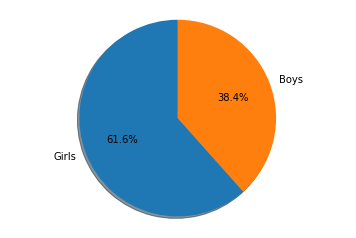

In [50]:
fig1, ax1 = plt.subplots()
ax1.pie(survey_data_row['Gender'].value_counts() , labels=survey_data_row['Gender'].value_counts().index , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### so we have the percent of girls more than boys 

### regarding question 3 we will perform unpaired t test between score of male and female , we will begin with the general data 


### we need to assume normality and equal variances to perform the test , since we have large enough sample, it tends to normal anyway

### First : Testing whether there is difference between survey score in general between males and females ( on the MAIN data)

#### we run unpaired / independent samples t test

In [51]:
general_test =stats.ttest_ind(survey_data_row.loc[survey_data_row.Gender=='Boys', ['Survey Score']], survey_data_row.loc[survey_data_row.Gender=='Girls', ['Survey Score']])

In [52]:
general_test

Ttest_indResult(statistic=array([-20.44470512]), pvalue=array([  1.72578688e-92]))

In [53]:
survey_data_row.loc[survey_data_row.Gender=='Boys', ['Survey Score']].mean()

Survey Score    0.769637
dtype: float64

In [54]:
survey_data_row.loc[survey_data_row.Gender=='Girls', ['Survey Score']].mean()

Survey Score    0.819326
dtype: float64

#### we have p value of  1.72578688e-92 less a lot than alpha = 0.05 , since statistic is negative and average of survey score is larger for girls , we think that with confidence level 95% that in general population girls tend to respond with higher scores to the whole questions set

### Second : Testing whether there is difference between average  survey score in  (parental involvement , teacher facility , and ICT skills ) related questions between males and females

#### Now we transfer to the performance of boys vs girls regarding average of questions sets related to teachers' performance , parents performance and ict skills

#### let' start with difference between boys , girls in parental involvement related questions

### we perform independent sample t test between boys and girls regarding each of the questions related to parental involvement

In [55]:
for i in range (6,13):
    print('')
    print(i-5)
    print ('independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : ' + data_of_parents_restructured.columns[i] + "'" )
    print('         ')
    print(stats.ttest_ind(data_of_parents_restructured.loc[data_of_parents_restructured.Gender=='Boys', data_of_parents_restructured.columns[i]], data_of_parents_restructured.loc[data_of_parents_restructured.Gender=='Girls', data_of_parents_restructured.columns [i]]))
    print('_____________')


1
independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : I want to be praised by parents when I perform well at school                                                     '
         
Ttest_indResult(statistic=-1.4672002157704185, pvalue=0.14273203881081081)
_____________

2
independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : My parents chat with me                                 '
         
Ttest_indResult(statistic=-6.0609337700383668, pvalue=2.1224161107886853e-09)
_____________

3
independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : My parents discuss my school performance with me                                   '
         
Ttest_indResult(statistic=-6.0937955412486327, pvalue=1.7456541070397788e-09)
_____________

4
independent sample t test measuring whether boys and girls differ regarding Question

### from the results above we can state that with confidence level of 95% girls have higher score in survey score in all questions related to parental involvement except question " My parents hired a private tutor to help me" since all p values are below 0.05 and test score is negative indicationg that girls have higher average 

#### then we transfer to average questions related to teachers facility , investigating whether gender makes difference in them


In [56]:
for i in range (6,11):
    print('')
    print(i-5)
    print ('independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : ' + data_of_teachers_restructured.columns[i] + "'" )
    print('         ')
    print(stats.ttest_ind(data_of_teachers_restructured.loc[data_of_teachers_restructured.Gender=='Boys', data_of_teachers_restructured.columns[i]], data_of_teachers_restructured.loc[data_of_teachers_restructured.Gender=='Girls', data_of_teachers_restructured.columns [i]]))
    print('_____________')


1
independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : Followed the teachers  instructions in class                             '
         
Ttest_indResult(statistic=-5.5439398431497953, pvalue=4.0715570230774372e-08)
_____________

2
independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : I want to be praised by my teachers when I perform well                                        '
         
Ttest_indResult(statistic=-1.801483721222082, pvalue=0.072019795063970271)
_____________

3
independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : My teachers give students opportunities to express opinions                                             '
         
Ttest_indResult(statistic=-5.469882456860951, pvalue=6.1012316823295562e-08)
_____________

4
independent sample t test measuring whether boys and girls differ 

### from the results above we can state that with confidence level of 95% girls have higher score in survey score in all questions related to teachers facility since all p values are below 0.05 and test score is negative indicationg that girls have higher average 

#### finally investigating if gender makes difference in performance at ICT skills

In [57]:
for i in range (6,19):
    print('')
    print(i-5)
    print ('independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : ' + data_of_ict_skills_restructured.columns[i] + "'" )
    print('         ')
    print(stats.ttest_ind(data_of_ict_skills_restructured.loc[data_of_ict_skills_restructured.Gender=='Boys', data_of_ict_skills_restructured.columns[i]], data_of_ict_skills_restructured.loc[data_of_ict_skills_restructured.Gender=='Girls', data_of_ict_skills_restructured.columns [i]]))
    print('_____________')


1
independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : I am comfortable using technology                                      '
         
Ttest_indResult(statistic=0.84897082156280246, pvalue=0.39616276173693432)
_____________

2
independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : I am really excited to explore new technology                                  '
         
Ttest_indResult(statistic=-1.8877703292366628, pvalue=0.059434542042942698)
_____________

3
independent sample t test measuring whether boys and girls differ regarding Questionnaire score of the question : I do homework on a computer laptop                                                                 '
         
Ttest_indResult(statistic=-3.9989744484214316, pvalue=6.9778554924203534e-05)
_____________

4
independent sample t test measuring whether boys and girls differ regarding Questionnaire 

### from the above results we see that regarding  questions "I am comfortable using technology" , "I like reading digitally rather than on paper" , "Manipulating objects on the screen" , "Reading and comprehending digital texts","Reading and comprehending digital texts" , "Typing on a keyboard","When I come across problems with technology  I am confident that I can resolve them" with confidence level of 95% we have no significant evidence that there is difference between their survey score between boys and girls

### Regarding other questions , since p value is less that 0.05 , and test statistic is negative indicating higher average for girls , we are confident with level of 95% that girls have higher score in these questions regarding ICT skills

# Q4: What other interesting insights you can find from this data?

### 1- some thing of interest i find is that we did not benefit from time spent to respond survey question, we can analyze relationship between evaluation of different prespectives , i.e parents , teachers ICT skills or other question categories .

### 2- we could have made some inferrence on school effect , especially if we had more data (not just code) of schools , since  schools of higher quality may be more interested in ICT skills, and having better criteria in choosing teachers.

### 3- we have a diversity of questions here like questions talks about using audio and video materials in education process like 'I watch educational videos' and other questions related to attitude of the student him/herself like 'I want top grades in most of my course'